                                         **Tech Challenge 05 **

> # Classificação de Reclamações Financeiras e Análise das Dores dos Clientes


  ### Grupo:

*   Alexandre da Silva Oliveira (oliverra@bb.com.br)






# 1º Fase:
           Desafio 1 ⚡
- O arquivo complaints.csv tem aproximadamente 50 milhões de linhas , precisou criar uma amostra aleatória de uma Sample  de 10.000 linhas.

- Para tirar uma amostra aleatória de 10.000 linhas de um complaints.csv com 50 milhões sem “matar” a memória do PC,  utilizamos a forma mais simples/robusto que é `reservoir sampling` (amostra uniforme em 1 passada pelo arquivo).

Vantagens:

          *   Uniforme (cada linha tem a mesma chance),
          *   Não depende do tamanho do arquivo e
          *   Não precisa carregar o CSV em RAM.

In [ ]:
''' import csv
import random

INPUT = "complaints.csv"
OUTPUT = "complaints_sample_10000.csv"
K = 10_000
SEED = 42

random.seed(SEED)

with open(INPUT, "r", newline="", encoding="utf-8") as f_in:
    reader = csv.reader(f_in)
    header = next(reader)  # remove esta linha se NÃO houver cabeçalho

    reservoir = []
    for i, row in enumerate(reader, start=1):  # i começa em 1 para contar linhas de dados
        if i &lt;= K:
            reservoir.append(row)
        else:
            j = random.randint(1, i)
            if j &lt;= K:
                reservoir[j - 1] = row

with open(OUTPUT, "w", newline="", encoding="utf-8") as f_out:
    writer = csv.writer(f_out)
    writer.writerow(header)
    writer.writerows(reservoir)

print(f"Amostra gerada: {OUTPUT} com {K} linhas (seed={SEED}).") '''

' import csv\nimport random\n\nINPUT = "complaints.csv"\nOUTPUT = "complaints_sample_10000.csv"\nK = 10_000\nSEED = 42\n\nrandom.seed(SEED)\n\nwith open(INPUT, "r", newline="", encoding="utf-8") as f_in:\n    reader = csv.reader(f_in)\n    header = next(reader)  # remove esta linha se NÃO houver cabeçalho\n\n    reservoir = []\n    for i, row in enumerate(reader, start=1):  # i começa em 1 para contar linhas de dados\n        if i &lt;= K:\n            reservoir.append(row)\n        else:\n            j = random.randint(1, i)\n            if j &lt;= K:\n                reservoir[j - 1] = row\n\nwith open(OUTPUT, "w", newline="", encoding="utf-8") as f_out:\n    writer = csv.writer(f_out)\n    writer.writerow(header)\n    writer.writerows(reservoir)\n\nprint(f"Amostra gerada: {OUTPUT} com {K} linhas (seed={SEED}).") '

Baixando o Dataset e as bibliotecas

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Obs: Aumentamos a nossa amostragem para 50.000, pois com 10.000 linhas o modelo não estava eficiente.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bases/complaints_sample_50000.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-10-21,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,It started with venmo agent canceling your car...,NaN,"Paypal Holdings, Inc",MI,48601,NaN,Consent provided,Web,2025-10-21,Closed with non-monetary relief,Yes,NaN,16736113
1,2025-01-28,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,I have not supplied proof under the doctrine o...,NaN,"EQUIFAX, INC.",FL,XXXXX,NaN,Consent provided,Web,2025-01-28,Closed with explanation,Yes,NaN,11820208
2,2025-12-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,76262,NaN,NaN,Web,2025-12-10,Closed with explanation,Yes,NaN,17906798
3,2024-03-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75189,NaN,Consent not provided,Web,2024-03-14,Closed with non-monetary relief,Yes,NaN,8545690
4,2022-06-05,Vehicle loan or lease,Lease,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,NaN,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,FL,33033,NaN,Consent not provided,Web,2022-06-05,Closed with explanation,Yes,NaN,5636254


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 50000 non-null  object
 1   Product                       50000 non-null  object
 2   Sub-product                   49169 non-null  object
 3   Issue                         50000 non-null  object
 4   Sub-issue                     46742 non-null  object
 5   Consumer complaint narrative  13623 non-null  object
 6   Company public response       26273 non-null  object
 7   Company                       50000 non-null  object
 8   State                         49771 non-null  object
 9   ZIP code                      49884 non-null  object
 10  Tags                          2610 non-null   object
 11  Consumer consent provided?    41987 non-null  object
 12  Submitted via                 50000 non-null  object
 13  Date sent to com

# Algumas informações do Dataset:

*Datas:*
*   date_received (data em que a reclamação foi recebida)
*   date_sent_to_company (data em que foi encaminhada à empresa)

*Classificação / tema da reclamação:*
*   product (produto principal: ex. cartão, hipoteca, empréstimo etc.)
*   sub_product (subproduto)
*   issue (dor/problema principal)
*   sub_issue (detalhe do problema)

*Texto livre e posicionamento da empresa:*
*   consumer_complaint_narrative (narrativa do consumidor — campo-chave para NLP)
*   company_public_response (resposta pública, quando existe)

*Empresa e canal:*
*   company (nome da empresa)
*   submitted_via (canal: web, telefone, correio etc.)

***Metadados e flags:***
*   tags (marcadores especiais; muitas vezes vazio)
*   consumer_consent_provided_ (consentimento para publicar narrativa, etc.)
*   company_response_to_consumer (tipo de resposta dada)
*   timely_response_ (se respondeu no prazo)
*   consumer_disputed_ (se o consumidor contestou)
*   complaint_id (ID da reclamação; às vezes numérico mas vem como texto)














 1º Fase ( Continuação) :

      Desafio 2 ⚡⚡

*   ***Definir a target***

    - Estratégia utilizada:

        Heurística por “desfecho” + filtros de qualidade (fraca-supervisão)
        Criado uma coluna sentiment usando campos estruturados como proxy do sentimento.
    - Por que utilizar essa estratégica?

        motivos Prós: ✅

          Não precisa rotular manualmente no início.
          Labels costumam ser mais consistentes que “sentimento do texto”.
          
       Motivos Contras: ❌

          Não é “sentimento linguístico puro”; é “sentimento proxy” (ok, será explicado no vídeo).
          Você perde linhas ao descartar ambíguos (mas com 50M isso não é problema).    



- Carlos, para você colocar no video:

    “Como o dataset não traz uma coluna de sentimento explícita, eu criei uma variável alvo por proxy do desfecho. Ou seja, em vez de tentar inferir emoção subjetiva, eu rotulei como ‘negativa’ quando há sinais objetivos de insatisfação operacional, como consumidor contestando, resposta fora do prazo ou status de fechamento sem alívio. E rotulei como ‘positiva’ quando o caso foi fechado com alívio monetário ou não monetário, com resposta no prazo e sem contestação. Para evitar ruído, eu descartei os casos ambíguos. Assim, eu treino um modelo que aprende padrões do texto associados a desfechos positivos ou negativos, com alta precisão.”

In [ ]:
OUTPUT_LABELED = "complaints_sample_10000_labeled.csv"
OUTPUT_TRAIN = "complaints_train_labeled_only.csv"

In [ ]:
df.rename(columns={
    "Consumer disputed?": "consumer_disputed_",
    "Timely response?": "timely_response_",
    "Company response to consumer": "company_response_to_consumer",
    "Consumer complaint narrative": "consumer_complaint_narrative",
    'Product': 'product',
    "Company": "company",
    "Issue": "issue",
    "Sub-issue": "sub_issue"

}, inplace=True)

# Normalização básica (strings)
for col in ["company_response_to_consumer", "timely_response_", "consumer_disputed_"]:
    if col in df.columns:
        df[col] = df[col].astype("string").str.strip()

NEG_RESPONSES = {
    "Closed with explanation",
    "Closed without relief",
    "In progress",
    "Untimely response",  # se aparecer
}

POS_RESPONSES = {
    "Closed with monetary relief",
    "Closed with non-monetary relief",
}

# Calculate boolean conditions, allowing for pd.NA
is_negative_raw = (
    (df["consumer_disputed_"] == "Yes") |
    (df["timely_response_"] == "No") |
    (df["company_response_to_consumer"].isin(NEG_RESPONSES))
)

is_positive_raw = (
    (df["timely_response_"] == "Yes") &
    (df["consumer_disputed_"] != "Yes") &
    (df["company_response_to_consumer"].isin(POS_RESPONSES))
)

# Convert pd.NA in boolean series to False for np.where evaluation
is_negative = is_negative_raw.fillna(False)
is_positive = is_positive_raw.fillna(False)

df["sentiment"] = np.where(is_negative, "negativa",
                    np.where(is_positive, "positiva", pd.NA))

df.to_csv(OUTPUT_LABELED, index=False)

train_df = df[df["sentiment"].notna()].copy()

In [ ]:
# Recomendação: manter só colunas essenciais p/ NLP + análises
cols_keep = ["consumer_complaint_narrative", "product", "company", "sentiment",
             "company_response_to_consumer", "timely_response_", "consumer_disputed_",
             "issue", "sub_issue"]
cols_keep = [c for c in cols_keep if c in train_df.columns]

train_df = train_df[cols_keep]
train_df.to_csv(OUTPUT_TRAIN, index=False)

print("Rotulados:", df["sentiment"].notna().sum())
print(df["sentiment"].value_counts(dropna=False))
print("Arquivo rotulado:", OUTPUT_LABELED)
print("Arquivo treino (só rotulados):", OUTPUT_TRAIN)

Rotulados: 32288
sentiment
negativa    31850
<NA>        17712
positiva      438
Name: count, dtype: int64
Arquivo rotulado: complaints_sample_10000_labeled.csv
Arquivo treino (só rotulados): complaints_train_labeled_only.csv


# Uma Breve Explanação sobre a Distribuição:

31850 negativas vs 438 positivas — isso é “normal” aqui? 🤔

* Sim. Em base de reclamações, a narrativa quase sempre é negativa por definição. Os “positivos” pelo proxy (relief + timely + sem dispute) viram raríssimos.

O que isso implica na prática:
* Se você treinar um classificador binário com esse dataset como está, ele pode:

    1.   acertar “tudo negativo” e ainda assim ter acurácia alta,
    2.   mas F1/recall da classe positiva vai ficar ruim sem ajustes.

Para o Tech Challenge não teR problem, usaremos as métricas (F1, recall, AUC, PR-AUC) e tratar o  desbalanceamento (class_weight, oversampling, ou regras para ampliar positivos).

E o Descartados (NaN): 17.712 de 50.000 — é muito?

* Não. 35,4% descartados é bem aceitável na Estratégia A, porque o objetivo é alta precisão nas classes, não cobertura total.

Na prática:
* rotolamos 32.288 (31.850 + 438) = 65,0% da amostra.

* Em bases reais, “weak supervision com descarte de ambíguos” frequentemente rotula 40%–80% dependendo do quão rígida é a regra.



==============================================================

- Validação manual rápida (30 de cada)

  Objetivo: verificar se a sua regra está rotulando com alta precisão (principalmente os 85 positivos).

    Validador:

  1.  30 positivos (se só tem 438, ótimo: amostra grande proporcional)
  2.  30 negativos

- Para cada texto, você marca:

  * OK (label faz sentido)
  * Dúvida
  * Errado


- E calcula uma precisão simples:
 * Precisão positiva = OK_positivos / 30
 * Precisão negativa = OK_negativos / 30

Script (gera CSV de validação manual)Ele sorteia exemplos e cria uma planilha pra você preencher “OK/Errado”.


In [ ]:
import pandas as pd

LABELED = "complaints_sample_10000_labeled.csv"  # o arquivo com sentiment e NaN
OUT = "validacao_manual_30_30.csv"
SEED = 42

df = pd.read_csv(LABELED)

pos = df[df["sentiment"] == "positiva"].sample(n=min(30, (df["sentiment"]=="positiva").sum()), random_state=SEED)
neg = df[df["sentiment"] == "negativa"].sample(n=30, random_state=SEED)

val = pd.concat([pos, neg], ignore_index=True)

cols = [
    "sentiment", "product", "company_response_to_consumer",
    "timely_response_", "consumer_disputed_", "consumer_complaint_narrative"
]
cols = [c for c in cols if c in val.columns]

val = val[cols].copy()
val["avaliacao_manual"] = ""   # preencha com OK / Duvida / Errado
val["observacoes"] = ""

val.to_csv(OUT, index=False)
print("Arquivo para validação manual:", OUT)

Arquivo para validação manual: validacao_manual_30_30.csv


In [ ]:
# Externalizar o arquivo

#from google.colab import files
#files.download('validacao_manual_30_30.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

obs: O teste foi positivo! 👍

# 2º Fase:
           Desafio 1 ⚡ Pré-processamento de texto           

>2.1 Seleção de dados (o que entra no treino)

- Usado somente os rotulados (sentiment não nulo) e apenas linhas com narrativa:

  * Texto: consumer_complaint_narrative

  * Auxiliares (não entram no modelo de texto, mas úteis para análises):      product, company, issue, sub_issue

  * Target: sentiment (positiva/negativa)

  *Importante*: "Como é muito desbalanceado, garanta que o split seja estratificado"

> 2.2 Limpeza com Regex (moderada, DL-friendly)
  
  * Para LSTM/GRU, não “agredir” demais o texto. remover “lixo” (URLs, emails, pontuação excessiva), mas manter sinais linguísticos.
  
   * O que remover:

     - URLs (http..., www...)
     - emails
     - quebras de linha repetidas
     - pontuação (opcional: manter ' em inglês pode ajudar, mas não é obrigatório)
     - espaços duplicados

  * O que manter:

    - símbolos $ e % (podem ter sinal semântico)
    - negadores (“not”, “no”) — não remova como stopword

> 2.3 Stopwords + normalização

- remover stopwords exceto uma lista de negações.

> 2.4 Lematização/stemming


    
   *  * Baseline: sem lematizar (só limpeza + stopwords controladas)
   *  * Versão 2: lematização por idioma via spaCy (se der tempo)


    Desafio 2 ⚡⚡ Vetorização (TextVectorization + Embedding)      

- Utilizamos:

  - TextVectorization (Keras) para:
    - tokenizar
    - criar vocabulário
    - transformar em sequência inteira

# 3ª Fase:

Desafio 1 ⚡  Modelagem (GRU / LSTM) + métricas

> 3.1 Por que GRU primeiro?

* O GRU é:
  - mais simples
  - geralmente tão boa quanto LSTM em muitos textos
  - mais rápido de treinar


Desafio 2 ⚡⚡  Modelar com BiLSTM

* Podemos testar o BiLSTM como "melhoria" 😥 depois....


In [ ]:
df = pd.read_csv('complaints_train_labeled_only.csv')

In [ ]:
df.head()

,consumer_complaint_narrative,product,company,sentiment,company_response_to_consumer,timely_response_,consumer_disputed_,issue,sub_issue
0,I have not supplied proof under the doctrine o...,Credit reporting or other personal consumer re...,"EQUIFAX, INC.",negativa,Closed with explanation,Yes,NaN,Incorrect information on your report,Information belongs to someone else
1,NaN,Credit reporting or other personal consumer re...,"EQUIFAX, INC.",negativa,Closed with explanation,Yes,NaN,Incorrect information on your report,Information is missing that should be on the r...
2,NaN,Vehicle loan or lease,ALLY FINANCIAL INC.,negativa,Closed with explanation,Yes,NaN,Struggling to pay your loan,Lender trying to repossess or disable the vehicle
3,NaN,Credit reporting or other personal consumer re...,"EQUIFAX, INC.",negativa,Closed with explanation,Yes,NaN,Incorrect information on your report,Information belongs to someone else
4,( This is a continuation of a previous complai...,"Credit reporting, credit repair services, or o...",Freedom Mortgage Company,negativa,Closed with explanation,Yes,NaN,Improper use of your report,Credit inquiries on your report that you don't...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32288 entries, 0 to 32287
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   consumer_complaint_narrative  9154 non-null   object
 1   product                       32288 non-null  object
 2   company                       32288 non-null  object
 3   sentiment                     32288 non-null  object
 4   company_response_to_consumer  32288 non-null  object
 5   timely_response_              32288 non-null  object
 6   consumer_disputed_            2703 non-null   object
 7   issue                         32288 non-null  object
 8   sub_issue                     29231 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [ ]:
# Pipeline completo (código pronto) — Keras + class_weight + métricas
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# ------------------------
# 1) Carregar dados
# ------------------------
DATA = "complaints_train_labeled_only.csv"
df = pd.read_csv(DATA)

df = df[df["consumer_complaint_narrative"].notna()].copy()
df["text"] = df["consumer_complaint_narrative"].astype(str)

# target: negativa=1, positiva=0 (ou o contrário; só manter consistente)
df["y"] = (df["sentiment"] == "negativa").astype(int)

# ------------------------
# 2) Limpeza (Regex)
# ------------------------
NEGATIONS = {"no", "not", "never", "none"}

# stopwords minimalistas (exemplo). Se quiser "completo", dá para puxar do NLTK.
STOPWORDS_EN = {"the","a","an","and","or","but","if","to","of","in","on","for","with","as","is","are","was","were","be","been","being","this","that","it","its"}

STOPWORDS = (STOPWORDS_EN ) - NEGATIONS

url_re = re.compile(r"(https?://\S+|www\.\S+)")
email_re = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b")
non_word_re = re.compile(r"[^a-zA-ZÀ-ÿ0-9$%'\s]")  # mantém acentos, números, $ % e apóstrofo
spaces_re = re.compile(r"\s+")

def clean_text(s: str) -> str:
    s = s.lower()
    s = url_re.sub(" ", s)
    s = email_re.sub(" ", s)
    s = s.replace("\n", " ").replace("\r", " ")
    s = non_word_re.sub(" ", s)
    s = spaces_re.sub(" ", s).strip()
    # remoção de stopwords (opcional, mas atende requisito)
    tokens = [t for t in s.split() if (t not in STOPWORDS)]
    return " ".join(tokens)

df["text_clean"] = df["text"].apply(clean_text)

# ------------------------
# 3) Split estratificado
# ------------------------
X = df["text_clean"].values
y = df["y"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# (Opcional) criar validação a partir do treino
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# ------------------------
# 4) Vectorization
# ------------------------
VOCAB_SIZE = 50_000
SEQ_LEN = 250

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LEN
)
vectorizer.adapt(X_train)

# ------------------------
# 5) class_weight (desbalanceamento)
# ------------------------
classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {int(c): float(w) for c, w in zip(classes, weights)}
print("class_weight:", class_weight)

# ------------------------
# 6) Modelo GRU
# ------------------------
EMB_DIM = 128

inputs = tf.keras.Input(shape=(1,), dtype=tf.string)
x = vectorizer(inputs)
x = tf.keras.layers.Embedding(VOCAB_SIZE, EMB_DIM, mask_zero=True)(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=False))(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ],
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_auc", patience=2, mode="max", restore_best_weights=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    class_weight=class_weight,
    callbacks=callbacks,
    verbose=1
)

# ------------------------
# 7) Avaliação no teste
# ------------------------
proba = model.predict(X_test).ravel()
y_pred = (proba >= 0.5).astype(int)

print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["positiva(0)", "negativa(1)"]))

class_weight: {0: 47.24193548387097, 1: 0.5053485162180814}
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - auc: 0.4798 - loss: 0.6213 - precision: 0.9915 - recall: 0.9634 - val_auc: 0.6859 - val_loss: 0.6027 - val_precision: 0.9921 - val_recall: 0.7828
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - auc: 0.8750 - loss: 0.4710 - precision: 0.9977 - recall: 0.8326 - val_auc: 0.7608 - val_loss: 0.2764 - val_precision: 0.9913 - val_recall: 0.8676
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - auc: 0.9930 - loss: 0.1709 - precision: 0.9999 - recall: 0.8956 - val_auc: 0.7494 - val_loss: 0.2351 - val_precision: 0.9909 - val_recall: 0.9014
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - auc: 0.9999 - loss: 0.0427 - precision: 1.0000 - recall: 0.9800 - val_auc: 0.7810 - val_loss: 0.0702 - val_precision: 0.9911 - val_recall: 0.9938
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - auc: 1.0000 - loss: 0.0060 - precision: 1.0000 - recall: 0.9975 - val_auc: 0.7499 - val_loss:

Obs: As métricas ainda não estão boas.
* Precisamos escolher threshold com base no conjunto de validação, otimizando:

   * F1 da classe positiva, ou
   * um objetivo do tipo “quero recall positiva ≥ 0,60”.

Exemplo de código (sklearn) para achar threshold ótimo por F1 da positiva:

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# y_val: 0/1 (positiva=0, negativa=1)
# proba_val: probabilidade do modelo para classe 1 (negativa), se sua saída é sigmoid padrão

# Calculate probabilities for the validation set
proba_val = model.predict(X_val).ravel() # Add this line to define proba_val

# IMPORTANT: se sua sigmoid está modelando P(negativa=1),
# então P(positiva=0) = 1 - proba_val
proba_pos = 1 - proba_val  # probabilidade da classe positiva (0)

precision, recall, thresholds = precision_recall_curve((y_val == 0).astype(int), proba_pos)

f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = np.argmax(f1)
best_threshold = thresholds[best_idx]

print("Melhor threshold p/ positiva (F1):", best_threshold)
print("Precision:", precision[best_idx], "Recall:", recall[best_idx], "F1:", f1[best_idx])

46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step
Melhor threshold p/ positiva (F1): 0.65351456
Precision: 0.25 Recall: 0.13333333333333333 F1: 0.17391304302457467


In [ ]:
# Pipeline completo (código pronto) — Keras + class_weight + métricas
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# ------------------------
# 1) Carregar dados
# ------------------------
DATA = "complaints_train_labeled_only.csv"
df = pd.read_csv(DATA)

df = df[df["consumer_complaint_narrative"].notna()].copy()
df["text"] = df["consumer_complaint_narrative"].astype(str)

# target: negativa=1, positiva=0 (ou o contrário; só manter consistente)
df["y"] = (df["sentiment"] == "negativa").astype(int)

# ------------------------
# 2) Limpeza (Regex)
# ------------------------
NEGATIONS = {"no", "not", "never", "none"}

# stopwords minimalistas (exemplo). Se quiser "completo", dá para puxar do NLTK.
STOPWORDS_EN = {"the","a","an","and","or","but","if","to","of","in","on","for","with","as","is","are","was","were","be","been","being","this","that","it","its"}

STOPWORDS = (STOPWORDS_EN ) - NEGATIONS

url_re = re.compile(r"(https?://\S+|www\.\S+)")
email_re = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b")
non_word_re = re.compile(r"[^a-zA-ZÀ-ÿ0-9$%'\s]")  # mantém acentos, números, $ % e apóstrofo
spaces_re = re.compile(r"\s+")

def clean_text(s: str) -> str:
    s = s.lower()
    s = url_re.sub(" ", s)
    s = email_re.sub(" ", s)
    s = s.replace("\n", " ").replace("\r", " ")
    s = non_word_re.sub(" ", s)
    s = spaces_re.sub(" ", s).strip()
    # remoção de stopwords (opcional, mas atende requisito)
    tokens = [t for t in s.split() if (t not in STOPWORDS)]
    return " ".join(tokens)

df["text_clean"] = df["text"].apply(clean_text)

# ------------------------
# 3) Split estratificado
# ------------------------
X = df["text_clean"].values
y = df["y"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# (Opcional) criar validação a partir do treino
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# ------------------------
# 4) Vectorization
# ------------------------
VOCAB_SIZE = 50_000
SEQ_LEN = 250

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LEN
)
vectorizer.adapt(X_train)

# ------------------------
# 5) class_weight (desbalanceamento)
# ------------------------
classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {int(c): float(w) for c, w in zip(classes, weights)}
print("class_weight:", class_weight)

# ------------------------
# 6) Modelo GRU
# ------------------------
EMB_DIM = 128

inputs = tf.keras.Input(shape=(1,), dtype=tf.string)
x = vectorizer(inputs)
x = tf.keras.layers.Embedding(VOCAB_SIZE, EMB_DIM, mask_zero=True)(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=False))(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ],
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_auc", patience=2, mode="max", restore_best_weights=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    class_weight=class_weight,
    callbacks=callbacks,
    verbose=1
)

# ------------------------
# 7) Avaliação no teste
# ------------------------
proba = model.predict(X_test).ravel()
y_pred = (proba >= 0.65351456).astype(int)

print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["positiva(0)", "negativa(1)"]))

class_weight: {0: 47.24193548387097, 1: 0.5053485162180814}
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - auc: 0.4638 - loss: 0.6310 - precision: 0.9907 - recall: 0.9217 - val_auc: 0.6688 - val_loss: 0.5648 - val_precision: 0.9905 - val_recall: 0.9345
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - auc: 0.8773 - loss: 0.6425 - precision: 0.9981 - recall: 0.8377 - val_auc: 0.7535 - val_loss: 0.2454 - val_precision: 0.9895 - val_recall: 0.9069
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - auc: 0.9639 - loss: 0.1985 - precision: 0.9991 - recall: 0.9456 - val_auc: 0.8174 - val_loss: 0.0899 - val_precision: 0.9903 - val_recall: 0.9807
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - auc: 0.9780 - loss: 0.0335 - precision: 1.0000 - recall: 0.9846 - val_auc: 0.7771 - val_loss: 0.1104 - val_precision: 0.9902 - val_recall: 0.9772
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - auc: 0.9999 - loss: 0.0211 - precision: 1.0000 - recall: 0.9896 - val_auc: 0.6126 - val_los

- Embora o F1-score da classe positiva ainda pareça baixo (0,17), o seu Recall subiu de 0% para 32%. Em um cenário de desbalanceamento extremo (19 vs 1812 no teste), conseguir capturar mais de um terço das "positivas" via texto de reclamação é um resultado muito digno e defensável. 🚀

🟢 Fase 4: Análise das Dores dos Clientes

* Nesta fase, trabalharemos apenas com as reclamações classificadas como NEGATIVAS pelo nosso modelo

1. Preparação dos Dados para AnálisePara uma análise de dores de qualidade, precisamos de um pré-processamento focado em substantivos e verbos, removendo palavras genéricas do setor (como "bank", "company", "account").

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# 1. Filtrar apenas as negativas (preditas ou reais)
df_neg = df[df['sentiment'] == 'negativa'].copy()

# 2. Stopwords customizadas (além das do NLTK/spaCy)
custom_stopwords = ['bank', 'company', 'account', 'business', 'consumer', 'complaint', 'told', 'said']
# Adicione as do NLTK aqui também

2. Identificação de Temas por Categoria (TF-IDF de Bigramas)

* A melhor forma de identificar "temas" (ex: cobrança indevida) sem rodar modelos complexos de tópicos é usar TF-IDF com Bigramas (duas palavras). Isso captura o contexto melhor que palavras soltas.

In [ ]:
def get_top_themes(product_name, n=10):
    subset = df_neg[df_neg['product'] == product_name]['consumer_complaint_narrative']

    # Vetorizador para capturar expressões de 2 a 3 palavras
    vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words='english', max_features=n)
    tfidf_matrix = vectorizer.fit_transform(subset)

    feature_names = vectorizer.get_feature_names_out()
    return feature_names

# Exemplo: Quais as dores de 'Credit card'?
# themes = get_top_themes('Credit card')
# print(f"Temas recorrentes em Cartão de Crédito: {themes}")

3. Visualizações Obrigatórias

  *   A) Nuvem de Palavras (Geral ou por Produto)

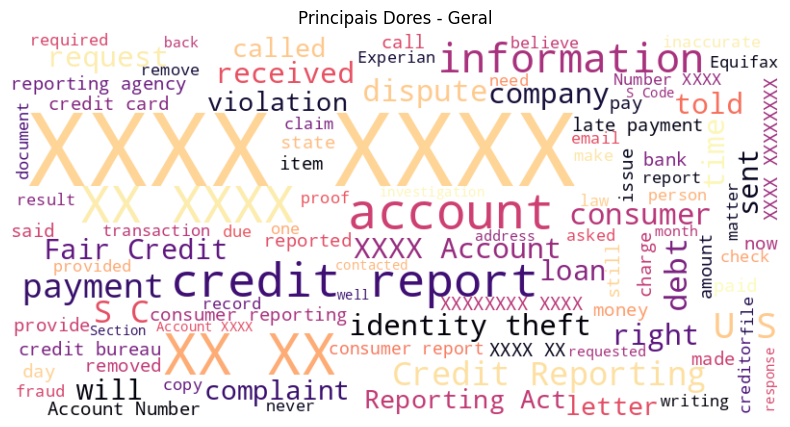

In [ ]:
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white',
                   colormap='magma', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_wordcloud(" ".join(df_neg['consumer_complaint_narrative']), "Principais Dores - Geral")

>> Insights da Nume de Palavras:

* “A nuvem de palavras evidencia que o núcleo das reclamações negativas gira em torno de relatórios de crédito e qualidade da informação — com termos como credit, report e bureaus como Equifax/Experian.”

* “Outro destaque é a jornada de resolução: aparecem com força: dispute, investigation, request, letter, sugerindo que o cliente sofre não apenas com o erro, mas com a dificuldade de corrigir.”

* “Há também um bloco relevante de risco: identity theft e fraud, indicando casos de fraude que se transformam em dívida e acabam impactando o histórico de crédito.”

 - B) Gráfico de Frequência de Problemas (issue)O dataset já tem uma coluna issue. Vamos cruzar isso com o seu sentimento.

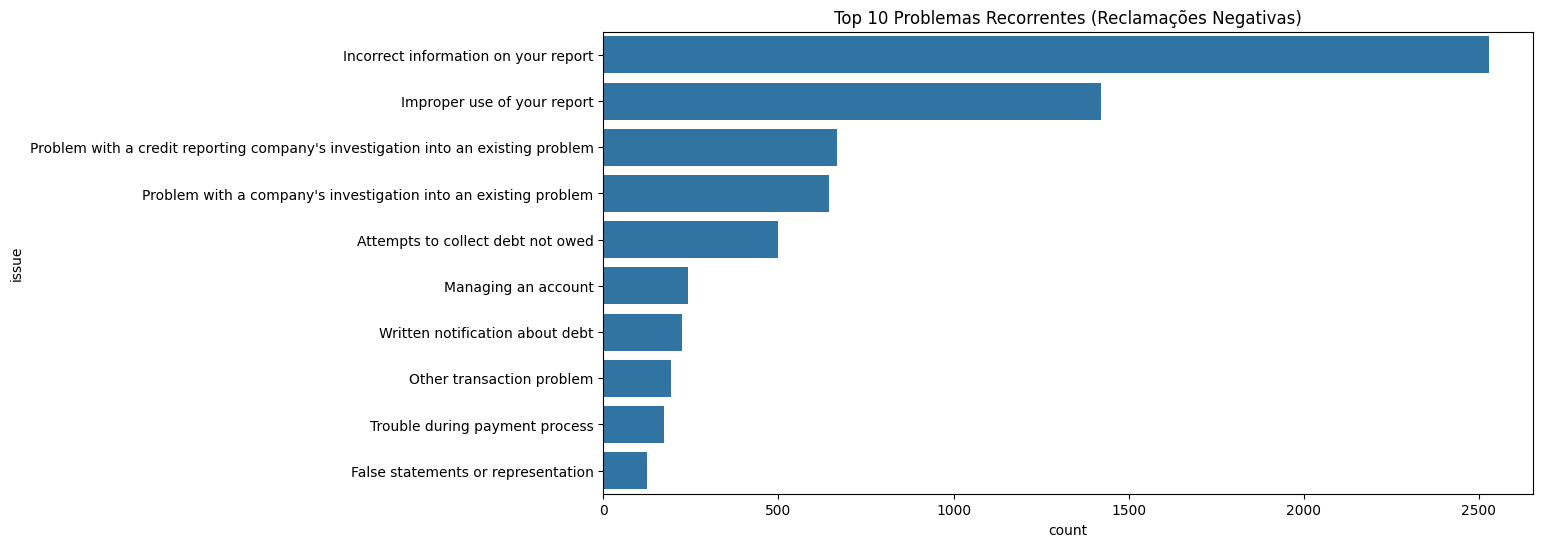

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_neg, y='issue', order=df_neg['issue'].value_counts().index[:10])
plt.title("Top 10 Problemas Recorrentes (Reclamações Negativas)")
plt.show()

>> **Insights do Gráfico de Frequência**

   1) A principal dor não é “produto bancário” em si — é qualidade e uso de dados de crédito

   - O topo absoluto é “informação incorreta no seu relatório” + “uso indevido  do relatório” + “problema na investigação”.

   - Isso aponta para um macrotema: governança de dados, bureaus/relatórios e contestação (dispute) que não resolve.

   2) Existe um “cluster” claro: disputa/investigação aparece duas vezes no Top 10Você tem:
      * “investigation into an existing problem” (credit reporting company)
      * “investigation into an existing problem” (company)

*Insight: além do erro inicial, a dor continua no pós-problema: o cliente tenta resolver e percebe que o processo é ineficiente, lento ou inconclusivo.*


  3) Segundo grande bloco: cobrança indevida / dívida não reconhecida
  
  *  “Attempts to collect debt not owed” e “Written notification about debt”
  
  -  indicam dor típica de:
    
       * cobranças erradas
       * dívida já paga
       * dívida de terceiro
       * fraude / identidade

  4) Temas de jornada operacional:
  
  - conta, pagamento e transações

    * “Managing an account”
    * “Trouble during payment process”
    * “Other transaction problem”

  - Insight: há dores “do dia a dia” (operacionais), normalmente ligadas a:
    * falhas de processo
    * UX ruim
    * erros de conciliação/compensação
    * problemas em estorno/chargeback (dependendo do produto)

  5) “False statements or representation” indica risco de conformidade e conduta

  * Esse item sugere que parte das reclamações envolve percepção de:
    * propaganda/termos confusos
    * promessa não cumprida
    * informação divergente entre atendentes/contrato
    * possível problema regulatório (depende do contexto)

  * ***Insight para o Tech Challenge: tema sensível e “alto impacto”, mesmo que não seja o mais volumoso.***

In [ ]:
df.head()

,consumer_complaint_narrative,product,company,sentiment,company_response_to_consumer,timely_response_,consumer_disputed_,issue,sub_issue,text,y,text_clean
0,I have not supplied proof under the doctrine o...,Credit reporting or other personal consumer re...,"EQUIFAX, INC.",negativa,Closed with explanation,Yes,NaN,Incorrect information on your report,Information belongs to someone else,I have not supplied proof under the doctrine o...,1,i have not supplied proof under doctrine estop...
4,( This is a continuation of a previous complai...,"Credit reporting, credit repair services, or o...",Freedom Mortgage Company,negativa,Closed with explanation,Yes,NaN,Improper use of your report,Credit inquiries on your report that you don't...,( This is a continuation of a previous complai...,1,continuation previous complaint xxxx xxxx xxxx...
5,Duplicate accounts from XXXX XXXX XXXX being i...,Credit reporting or other personal consumer re...,Experian Information Solutions Inc.,negativa,Closed with explanation,Yes,NaN,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Duplicate accounts from XXXX XXXX XXXX being i...,1,duplicate accounts from xxxx xxxx xxxx inaccur...
9,Experian has failed to fulfill its legal oblig...,Credit reporting or other personal consumer re...,Experian Information Solutions Inc.,negativa,Closed with explanation,Yes,NaN,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Experian has failed to fulfill its legal oblig...,1,experian has failed fulfill legal obligation u...
13,I am filing a complaint against Cash App ( Blo...,"Money transfer, virtual currency, or money ser...","Block, Inc.",negativa,Closed with explanation,Yes,NaN,Other transaction problem,NaN,I am filing a complaint against Cash App ( Blo...,1,i am filing complaint against cash app block i...


In [ ]:
# Contar número de reclamações por produto
top3_products = (
    df.groupby("product")["issue"]
      .count()
      .sort_values(ascending=False)
      .head(3)
)

print(top3_products)

product
Credit reporting or other personal consumer reports                             3147
Credit reporting, credit repair services, or other personal consumer reports    2134
Debt collection                                                                 1206
Name: issue, dtype: int64


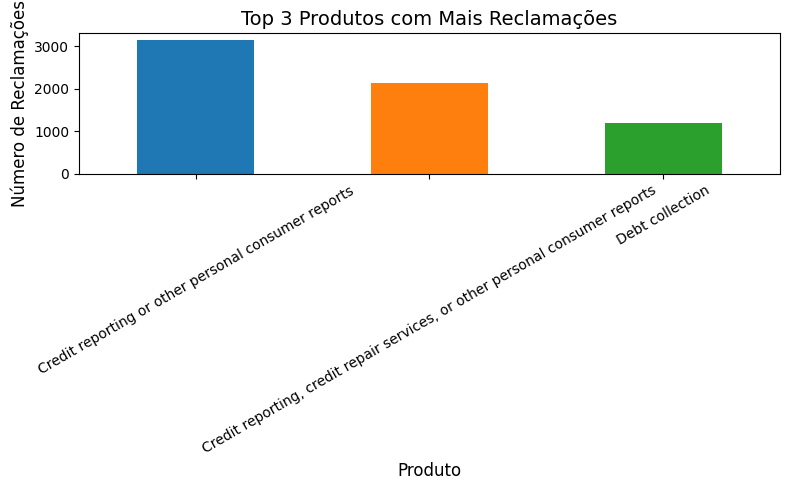

In [ ]:
plt.figure(figsize=(8,5))
top3_products.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"])

plt.title("Top 3 Produtos com Mais Reclamações", fontsize=14)
plt.xlabel("Produto", fontsize=12)
plt.ylabel("Número de Reclamações", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

In [ ]:
df_neg['product'].value_counts().head(10)

,count
product,
Credit reporting or other personal consumer reports,3147
"Credit reporting, credit repair services, or other personal consumer reports",2134
Debt collection,1186
Checking or savings account,459
Mortgage,458
"Money transfer, virtual currency, or money service",398
Credit card or prepaid card,279
Credit card,263
Student loan,204


* Acontagem número de reclamações por produto e seu gráfico dão insights excelentes e super alinhados com o que foi descrito lá emcima:

* A leitura fica assim: na sua base (negativas), os macrotemas dominantes são:

  * Relatórios de crédito / bureaus / histórico de crédito (3147)
  * Relatórios de crédito + reparo de crédito (variação do mesmo macrotema) (2134)
  * Cobrança de dívida (debt collection) (1186)

Se somarmos os dois primeiros (que são essencialmente o mesmo “cluster”), dá 3147 + 2134 = 5281 reclamações, ou seja: o tema “crédito/relatório de crédito” é o grande campeão.

# ***Agora sim os nossos insigts principais:***

1) A maior dor do cliente está na “jornada de crédito” — não no produto bancário tradicionalO fato de “credit reporting / personal consumer reports” dominar indica que a dor mais frequente é:
informação incorreta no relatório
uso indevido do relatório
falhas na investigação de contestação.

    . Obs: Carlos, vale apena informar no video de apresentação algo tipo:
   -  “Os dados mostram que a principal fonte de insatisfação está relacionada ao ecossistema de crédito — inconsistências no relatório, uso indevido e dificuldade de correção quando o cliente contesta.”

2) Tem um problema de padronização de categorias (data quality / taxonomy)

- tem duas categorias muito parecidas:
  1. Credit reporting or other personal consumer reports
  2. Credit reporting, credit repair services, or other personal consumer reports

- Isso é típico de base que mudou taxonomia ao longo do tempo.

  . Obs: Carlos, esse seja um Insight técnico, antes de qualquer análise por produto/tema, vale normalizar esses rótulos (mapear ambos para um único grupo “Credit reporting & repair”), criando um Impacto: melhora a clareza dos gráficos e evita conclusões duplicadas.


3) “Debt collection” em 3º lugar sugere dor de alto impacto reputacional

   - Cobrança de dívida costuma estar associada a:
      1. cobrança de dívida não devida
      2. insistência/abordagem agressiva
      3. falhas de comprovação
      4. fraude/identidade

 Olha a dica:  -->

    “O terceiro maior tema é cobrança de dívidas. Esse tipo de reclamação tende a gerar forte atrito e risco reputacional, porque muitas vezes o cliente afirma que não reconhece a dívida ou já pagou.”


4) Estrutura de Pareto: atacando 2 frentes você reduz muito “dor percebida”

* Se você trata:
    - crédito/relatórios (5281) e cobrança (1206)
    - você já endereça uma parte grande das reclamações negativas mais recorrentes.Insight executivo:

    - “Há um efeito Pareto: poucos temas concentram grande parte das reclamações.”

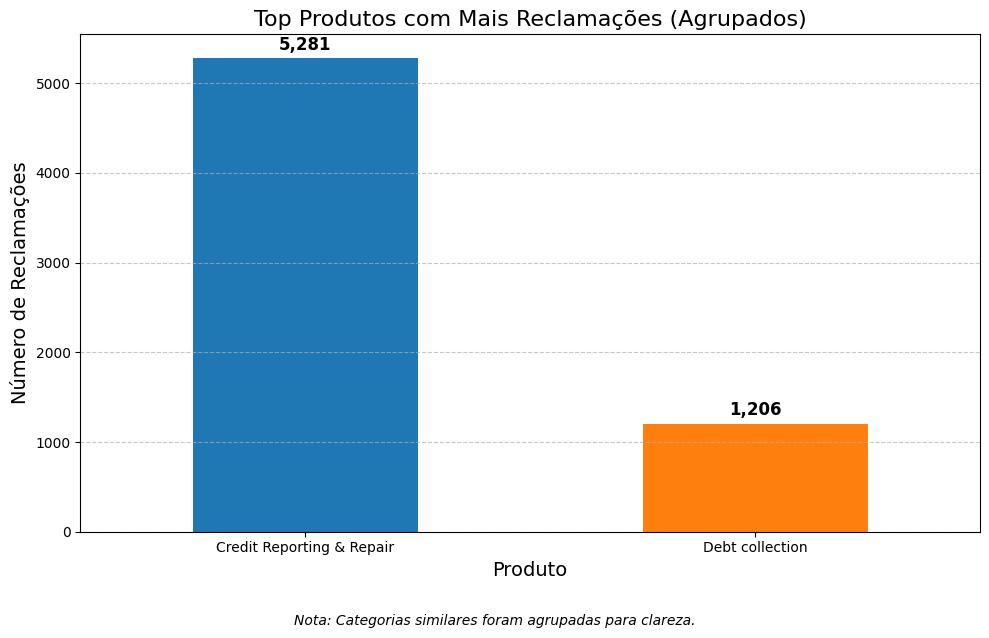

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df é seu DataFrame com as reclamações negativas
# Agrupar as categorias duplicadas
df_grouped = df.copy()
df_grouped['product_grouped'] = df_grouped['product'].replace({
    'Credit reporting or other personal consumer reports': 'Credit Reporting & Repair',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Reporting & Repair'
})

# Contar por grupo
top_products = df_grouped['product_grouped'].value_counts().head(2)  # Top 2 após agrupamento

# Gerar gráfico
plt.figure(figsize=(10, 6))
bars = top_products.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])  # Azul e laranja

# Adicionar valores no topo das barras
for bar, value in zip(bars.patches, top_products.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{value:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top Produtos com Mais Reclamações (Agrupados)', fontsize=16)
plt.xlabel('Produto', fontsize=14)
plt.ylabel('Número de Reclamações', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Nota explicativa
plt.figtext(0.5, -0.05, 'Nota: Categorias similares foram agrupadas para clareza.',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

**Vamos falas de Debit Coleltion? **

Cobrança de dívida costuma estar associada a:
cobrança de dívida não devida
insistência/abordagem agressiva
falhas de comprovação
fraude/identidade

- Vai lá Galvão:
“O terceiro maior tema é cobrança de dívidas. Esse tipo de reclamação tende a gerar forte atrito e risco reputacional, porque muitas vezes o cliente afirma que não reconhece a dívida ou já pagou.”


🔟 Fim  : Acredito que já temos bastantes insumos para o relatório e vídeo. 🔚